국가통계포털 KOSIS (Korean Statistical Information Service)
국내통계 - 주제별통계- 도소매/서비스 - 온라인쇼핑동향조사 - 국가/대륙별/상품군별 온라인쇼핑 해외직접판매역


- **K-Beauty는 성장하고 있을까?**
- 해외 직접판매를 한다면 어느 국가로 판매전략을 세워?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline   
#구버젼에서는 주피터에서 그래프 표시가 됨

In [2]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

In [3]:
#레티나 설정: 글씨 선명, 폰트주변 흐릿한거 방지
%config InlineBackground.figure_format = 'retina'

In [4]:
df_raw = pd.read_csv("data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221201103047.csv", encoding ='cp949')

사이트 하단에 각 값이 어떤 것을 의미하는 것인지가 나와있습니다.
예) e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호

In [5]:
df_raw.shape

(450, 27)

In [6]:
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

국가(대륙)이 미국인 데이터를 위주로 중점적으로 파악

In [7]:
df_raw["국가(대륙)별"]=="미국" #boolean indexing으로 나와

0      False
1      False
2      False
3      False
4      False
       ...  
445    False
446    False
447    False
448    False
449    False
Name: 국가(대륙)별, Length: 450, dtype: bool

In [8]:
df_raw[df_raw["국가(대륙)별"]=="미국"]['상품군별'].unique() #상품군 명칭 확인

array(['합계', '컴퓨터 및 주변기기', '가전·전자·통신기기', '소프트웨어', '서 적', '사무·문구',
       '음반·비디오·악기', '의류 및 패션 관련상품', '스포츠·레저용품', '화장품', '아동·유아용품', '음·식료품',
       '농축수산물', '생활용품 및 자동차용품', '기 타'], dtype=object)

# 데이터 전처리: tidy data 만들기

In [9]:
#  df_raw.melt?

In [10]:
df_raw.columns  #기간 데이터 정리 필요

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [11]:
#칼럼을 녹여서 행으로 내보내기
df = df_raw.melt(
        id_vars=["국가(대륙)별", "상품군별", "판매유형별"], #기준
          var_name="기간", #variable column 이름 지정
           value_name="백만원" #value column 이름 지정
            )
df.shape

(10800, 5)

In [12]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


## 기간에서 연도 분리

In [14]:
x = "2014 1/4 p)".split()[0]
x

'2014'

In [15]:
type(x)

str

In [16]:
int(x)

2014

In [17]:
df["기간"]      #object type => string data

0        2014.1/4
1        2014.1/4
2        2014.1/4
3        2014.1/4
4        2014.1/4
           ...   
10795    2019.4/4
10796    2019.4/4
10797    2019.4/4
10798    2019.4/4
10799    2019.4/4
Name: 기간, Length: 10800, dtype: object

In [18]:
"2014.1/4".split(".")    #"."을 기준으로 split

['2014', '1/4']

In [19]:
"2014.1/4".split(".")[0]

'2014'

In [20]:
#lambda라는 익명 함수, 기간을 x변수에 받아 
df["연도"] = df["기간"].map(lambda x : int(x.split(".")[0]))

In [21]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [22]:
"2014.1/4".split(".")[1].split("/")[0]    #기간에서 분기만 분리

'1'

In [23]:
df["분기"] = df["기간"].map(lambda x : int(x.split(".")[1].split("/")[0]))

In [24]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


## 금액을 수치데이터로 표현하기 위해 데이터 타입 변경

In [25]:
# - 문자를 결측치로 변경, float 타입으로 변경하기
# - 는 자료없음을 뜻하기 때문이다. 
import numpy as np

df["백만원"]= df["백만원"].replace("-", np.nan).astype(float)    
#pandas 내부의 넘파이를 불러올수 있어

df["백만원"]

0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
10795         0.0
10796       531.0
10797      1094.0
10798         1.0
10799      1093.0
Name: 백만원, Length: 10800, dtype: float64

In [26]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


## 필요없는 데이터 제거하기

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [28]:
#합계 데이터는 따로 구할 수 있어 -> 데이터에서 제거 
df = df[(df["국가(대륙)별"] != "합계") & 
         (df["상품군별"] != "합계") ].copy()
df.info() #메모리 줄어듦

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [29]:
df.isnull().sum()   #결측치 개수

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# K-Beauty 시각화

## 각 상품군 합계 판매액

In [36]:
df_total = df[df["판매유형별"]=="계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


In [31]:
# import os
# os.name #nt :윈도우 운영체제
#시각화를 위한 폰트 설정
# if os.name =="posix":
#     sns.set(font="AppleGothic")
# elif os.name =="nt":
# sns.set(font="MalgunGothic")

<Axes: xlabel='연도', ylabel='백만원'>

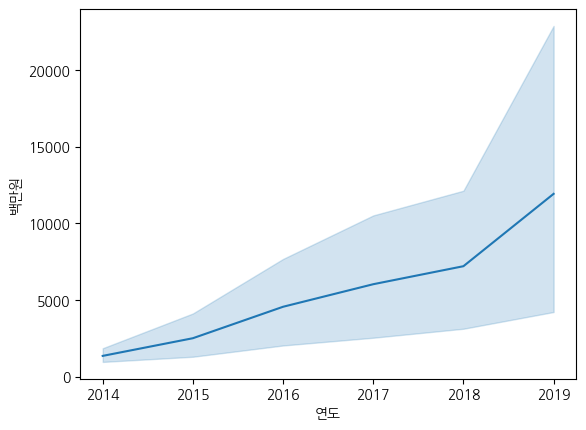

In [37]:
#연도별 총 합계 판매액 lineplot 그리기
sns.lineplot(data= df_total, x='연도', y='백만원')

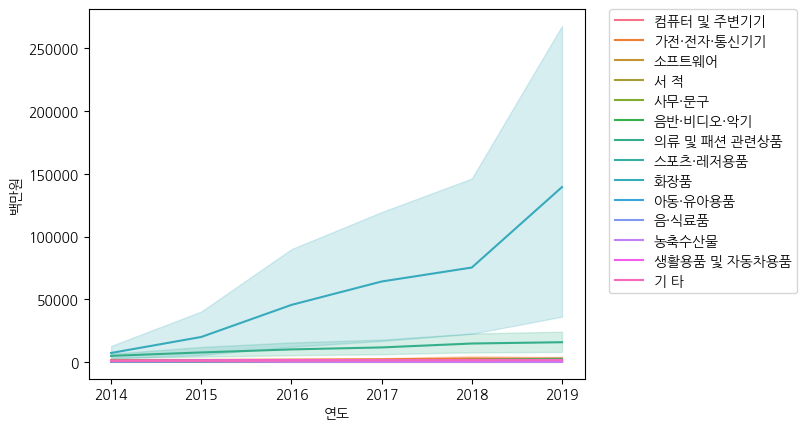

In [39]:
#상품군별로 다른 색상으로 표시하기 
sns.lineplot(data= df_total, x='연도', y='백만원', hue='상품군별' )

#https://stackoverflow.com/questions/30490740/
#legend 바깥 쪽에 표시하기 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

화장품 총 판매액이 압도적으로 많다

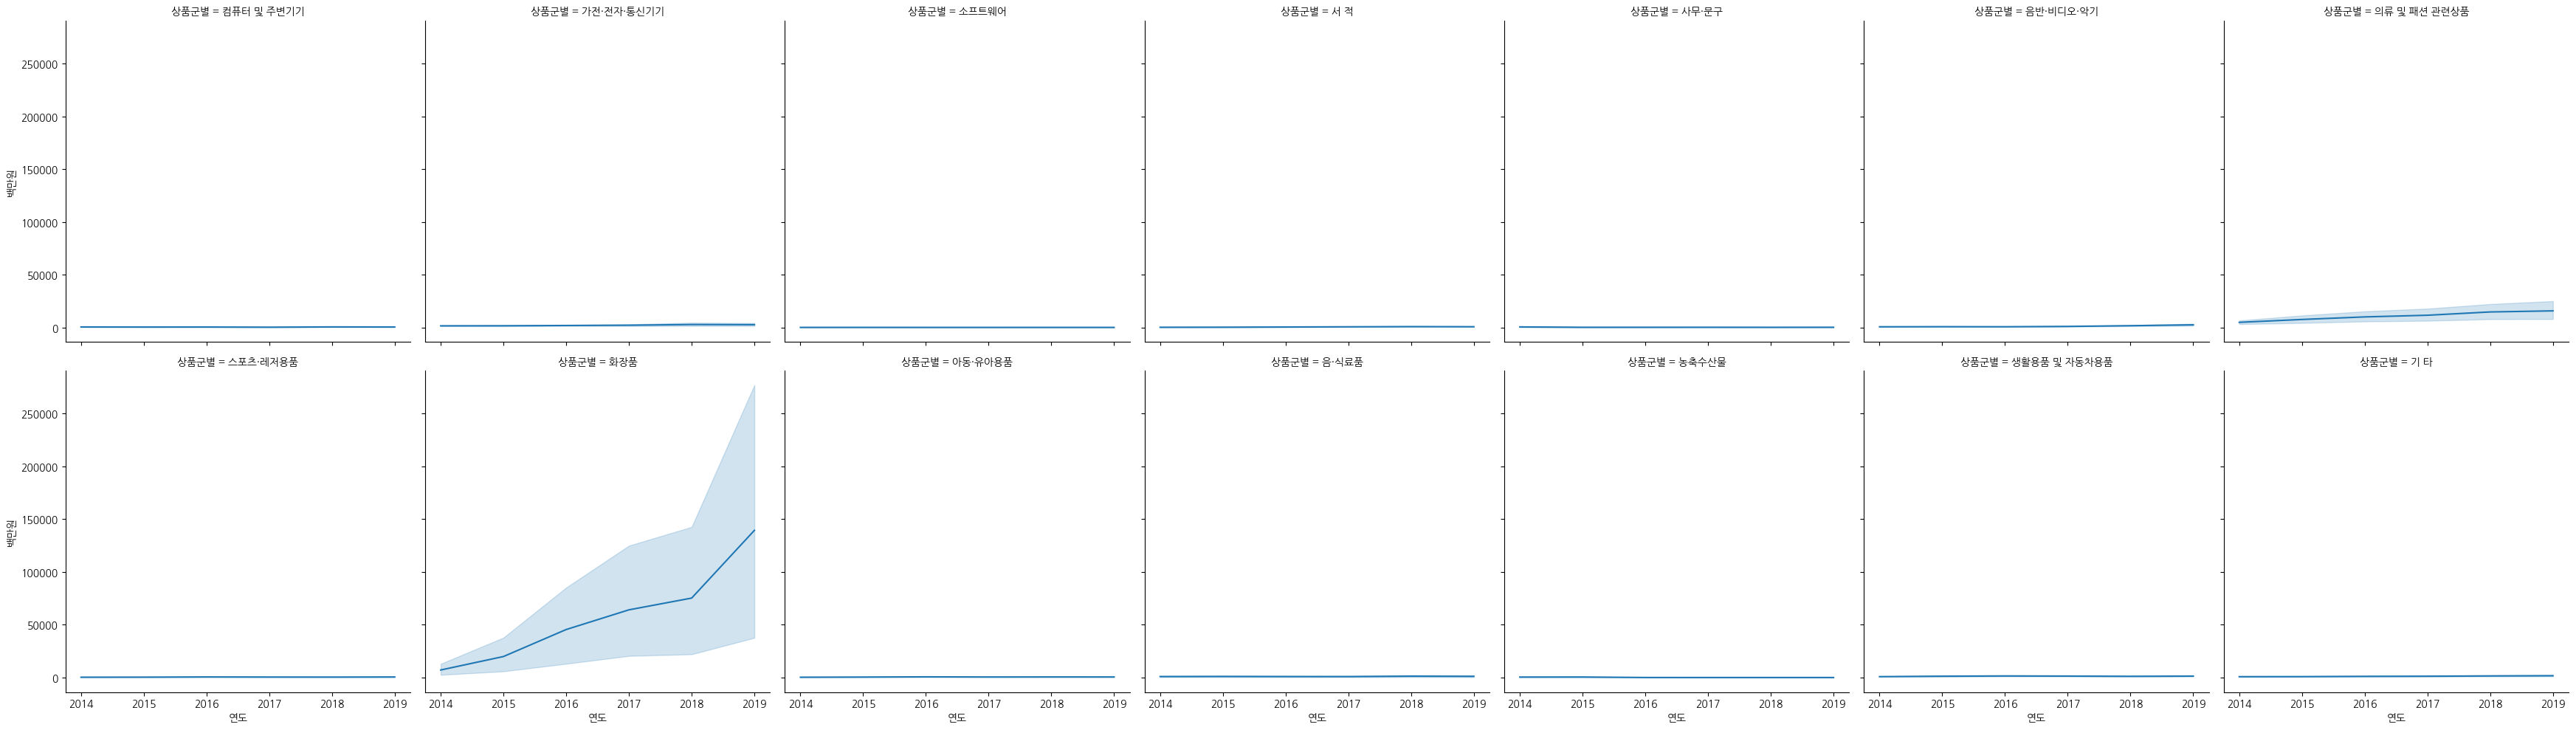

In [47]:
#연도별 총판매액 추이 (상품군별로)
sns.relplot(data=df_total, x='연도', y='백만원', 
#             hue='상품군별', 
            col='상품군별', 
            col_wrap=7, #한줄에 몇개를 표현할지 
            kind='line' #산점도를 선형으로 바꾸기
           )

- **의류 및 패션 관련상품도 아주 미미한 증가세가 있지만 화장품 상품군이 압도적인 성장률을 2018년을 기준으로 보이고 있다.**  

화장품을 기준으로는 다른 상품군의 성장세가 아주 작아서 불명확하게 보이기 때문에 화장품과 더불어 의류 상품군을 제외하고 남은 상품군들의 판매 성장세를 보겠다.

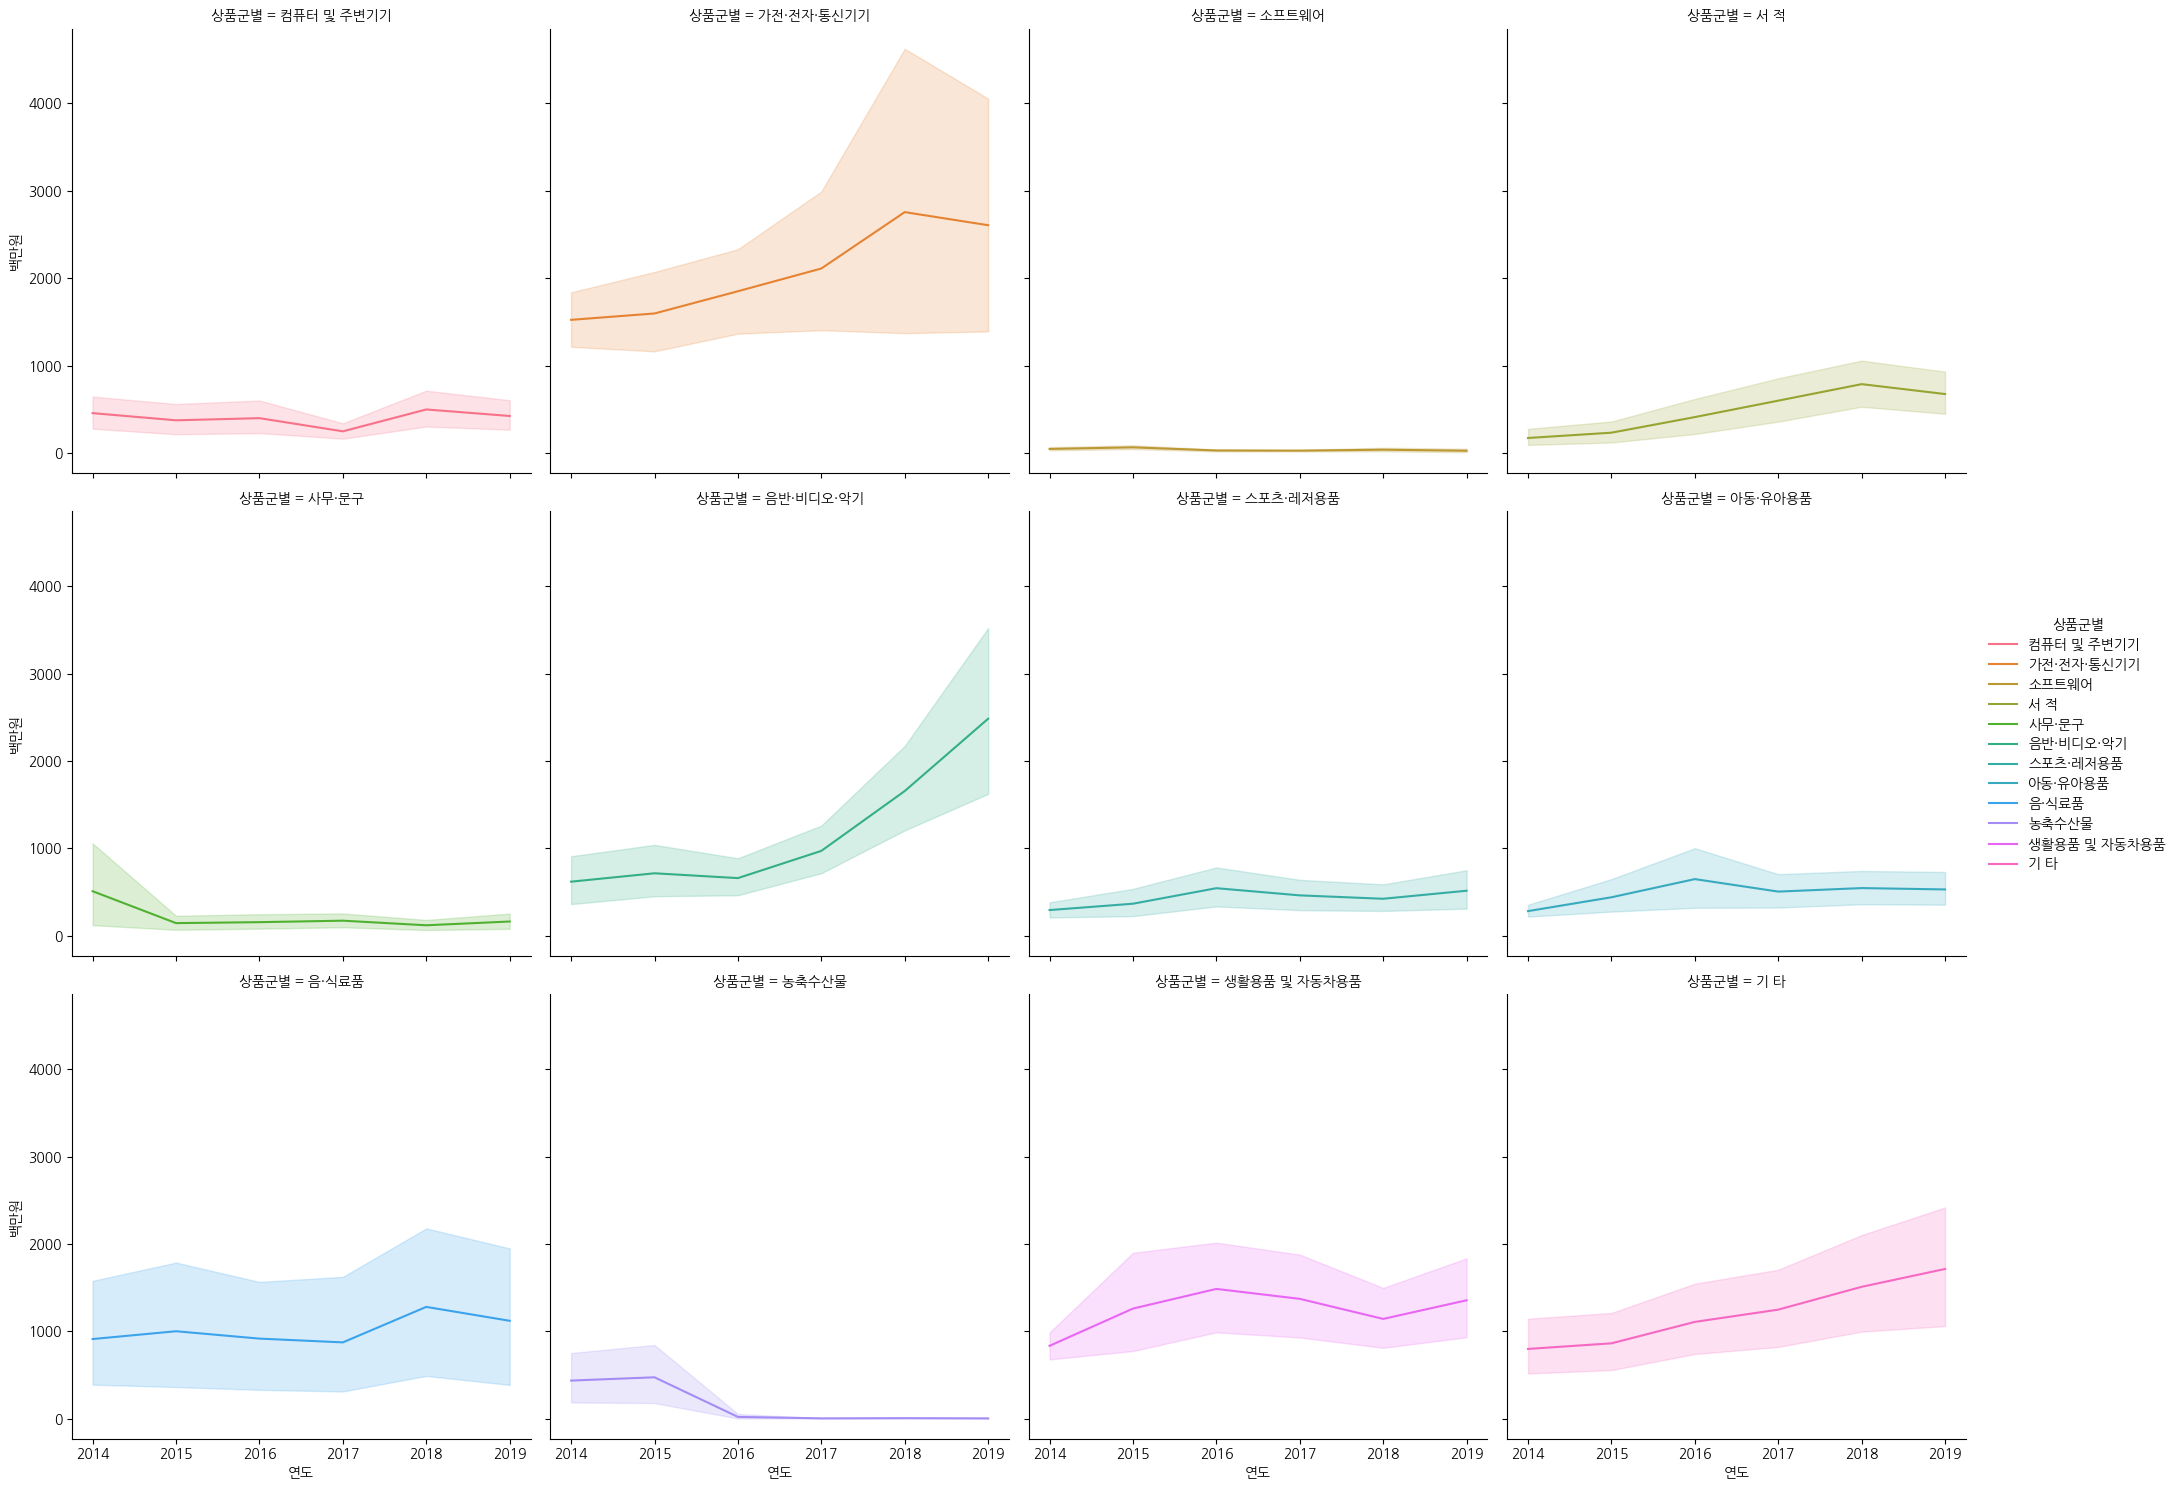

In [58]:
#화장품/의류 상품군 제외
df_sub = df_total[~df_total['상품군별'].isin(['화장품','의류 및 패션 관련상품'])]
sns.relplot(data=df_sub, x='연도', y='백만원', hue='상품군별',
           col='상품군별',
           col_wrap=4,
           kind="line")

- 가전/전자/통신기기, 음반/비디오/악기 상품군의 성장세가 눈에 띈다.   
그외에 음/식료품 상품군의 꾸준한 판매액도 확인할 수 있다. 

## 화장품 상품군의 온라인쇼핑 해외직접판매액
화장품 상품군의 성장세를 확인 한 후, 이 상품군의 분기별 판매액를 더 자세히 분석해 본다. 

In [60]:
#copy를 써줘야 df cosmetic에 영향을 줄 수 있어 
df_cosmetic  = df_total[df_total["상품군별"]=="화장품"].copy()

<AxesSubplot:xlabel='연도', ylabel='백만원'>

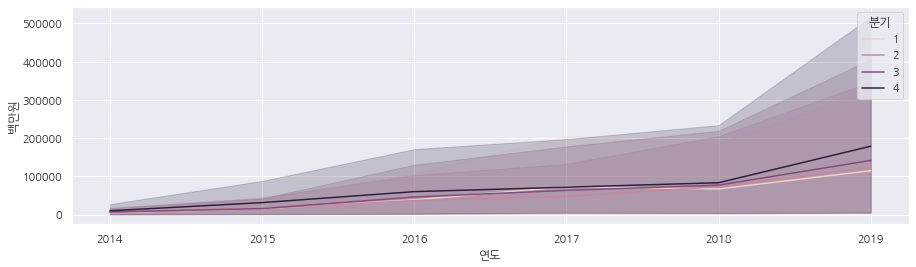

In [65]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_cosmetic, x ='연도', y='백만원', hue='분기')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

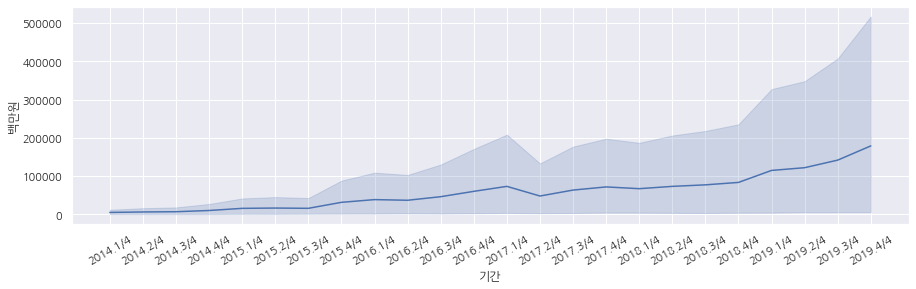

In [68]:
#화장품 판매액에 대한 기간별 금액 데이터 시각화 
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
#글씨 30도 정도 기울여서 봐 
sns.lineplot(data=df_cosmetic, x ='기간', y='백만원')

<Axes: xlabel='기간', ylabel='백만원'>

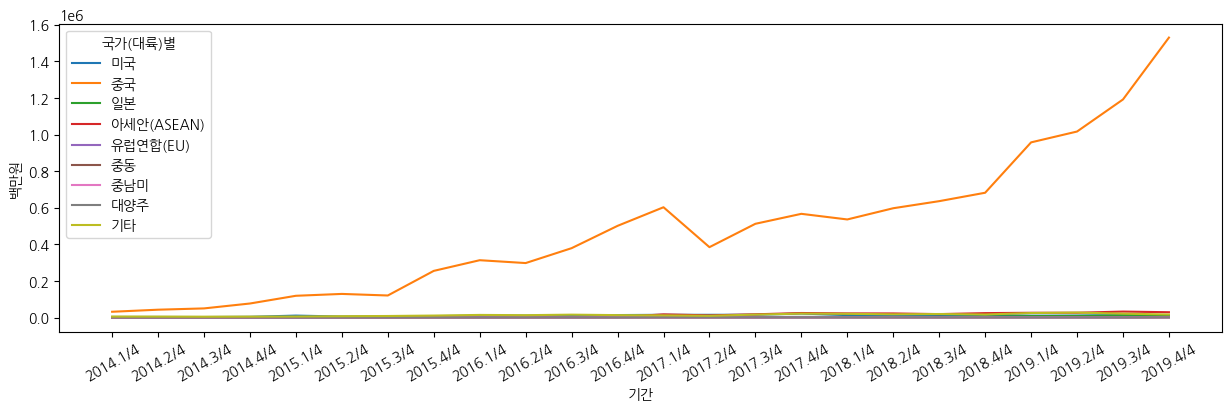

In [62]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
#글씨 30도 정도 기울여서 봐 
sns.lineplot(data=df_cosmetic, 
             x ='기간', y='백만원', 
             hue='국가(대륙)별')

최대 판매 시장은 중국이며 다른 나라와 격차가 크다 (2018.4분기 시점으로)

<Axes: xlabel='기간', ylabel='백만원'>

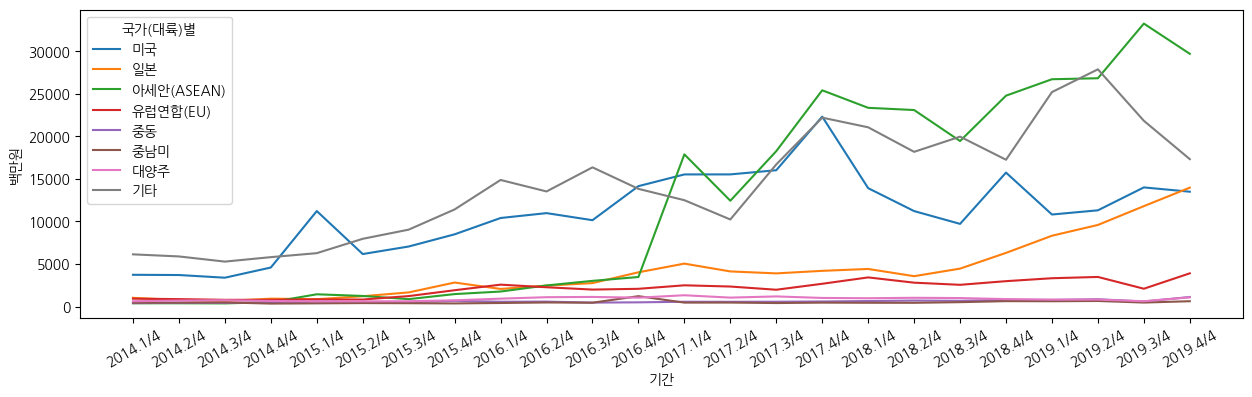

In [63]:
#중국을 제외하고 보기
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
#글씨 30도 정도 기울여서 봐 
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"]!="중국"], 
             x ='기간', y='백만원', 
             hue='국가(대륙)별')

중국 다음으로는 아세안 시장의 판매액이 높다

<Axes: xlabel='기간', ylabel='백만원'>

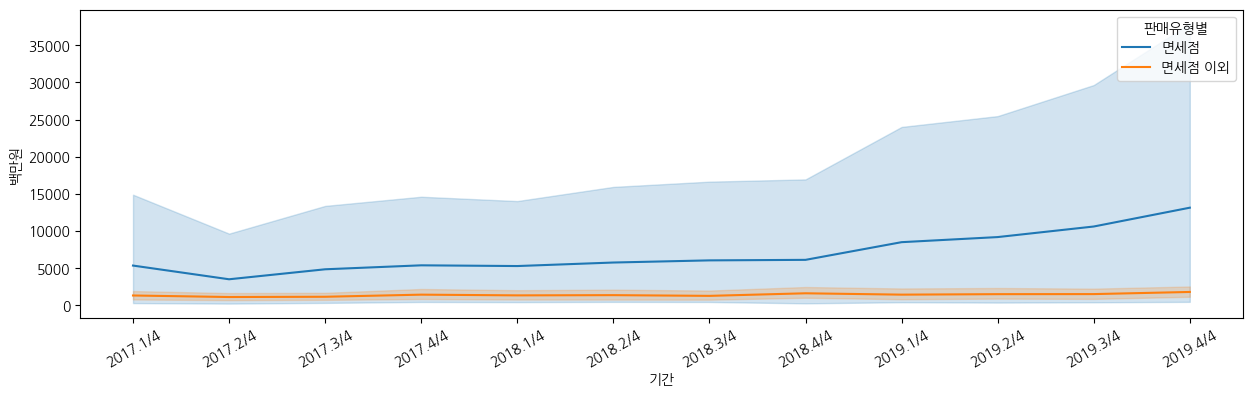

In [64]:
df_sub = df[df["판매유형별"]!="계"].copy()

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_sub, x='기간', y='백만원', hue='판매유형별')

면세점에서의 판매액 > 면세점 외의 판매액  
하지만 면세점 외의 판매액만을 놓고 보았을때 여기서의 성장도 분명 있다

<Axes: xlabel='기간', ylabel='백만원'>

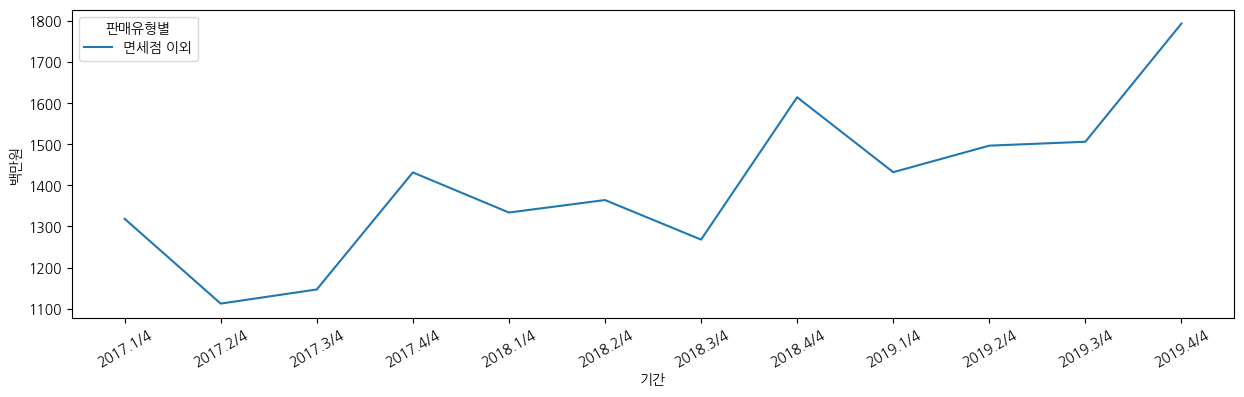

In [67]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)

df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()

sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", errorbar=None)

## 의류 및 패션 관련 상품 온라인 쇼핑 해외직접판매액

In [106]:
df_fashion = df[(df["상품군별"]=="의류 및 패션 관련상품") 
                & (df["판매유형별"]=="계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

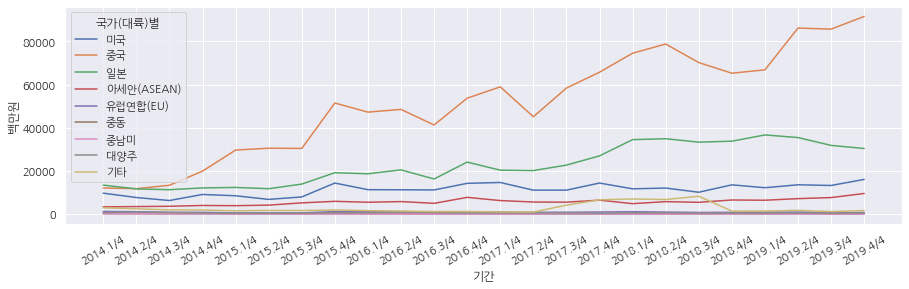

In [110]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x='기간', y='백만원',
            hue='국가(대륙)별')

<AxesSubplot:xlabel='기간', ylabel='백만원'>

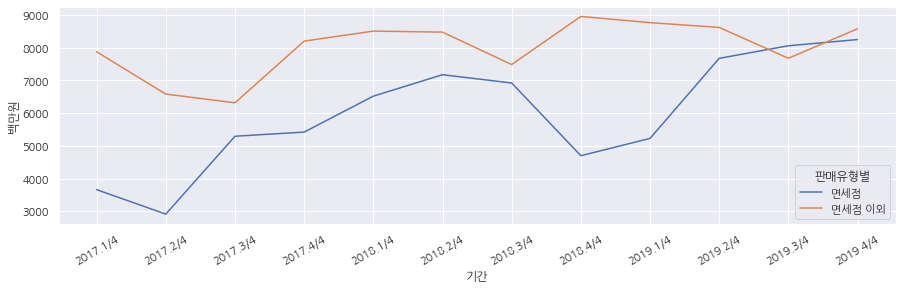

In [114]:
#기간별 금액 데이터 시각화 
df_fashion2 = df[(df["상품군별"]=="의류 및 패션 관련상품") 
                & (df["판매유형별"]!="계")].copy()

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x='기간', y='백만원',
            hue='판매유형별',
            ci=None)

## 데이터 집계하기

In [121]:
#df_fashion.pivot_table?
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1


In [123]:
result = df_fashion.pivot_table(index='국가(대륙)별',
                      columns="연도",
                      values="백만원",
                      aggfunc="sum") #aggfunc = mean is default
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,13192.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2716.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,51638.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,24297.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,4091.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90531.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,228330.0,288848.0,330267.0
중남미,975.0,616.0,649.0,772.0,576.0,544.0
중동,1172.0,1018.0,968.0,808.0,879.0,951.0


## 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

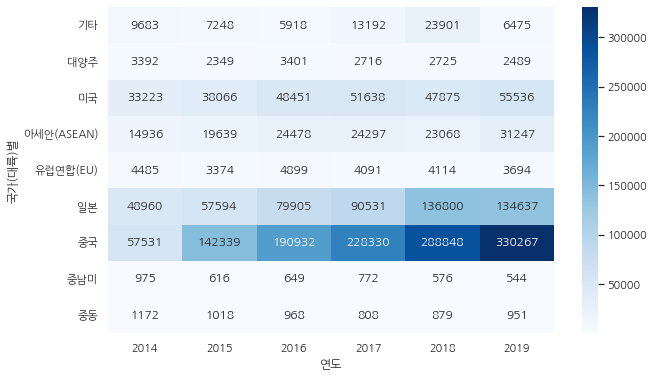

In [133]:
plt.figure(figsize=(10,6))
sns.heatmap(result, cmap="Blues", annot=True,
           fmt=".0f") #소숫점 없이 float형태로 표시 

# 전체상품군별 시각화

<AxesSubplot:xlabel='연도', ylabel='백만원'>

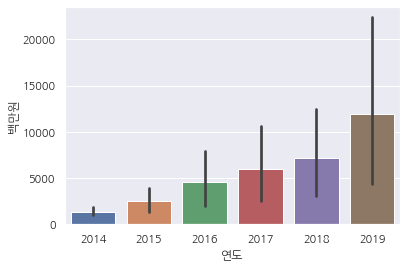

In [135]:
sns.barplot(data= df_total, x='연도', y='백만원')

<AxesSubplot:xlabel='연도', ylabel='백만원'>

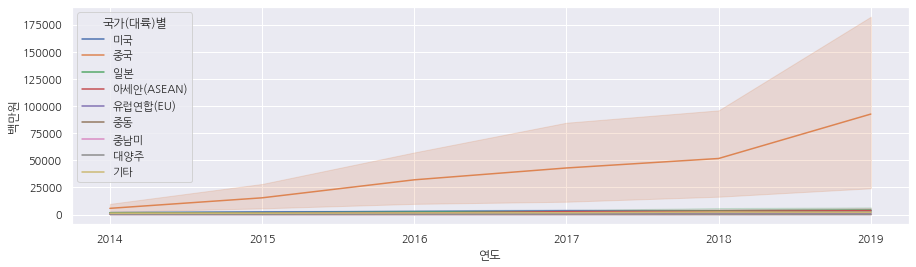

In [138]:
#연도별 판매액

plt.figure(figsize=(15,4))
sns.lineplot(data= df_total, x='연도', y='백만원', hue='국가(대륙)별')

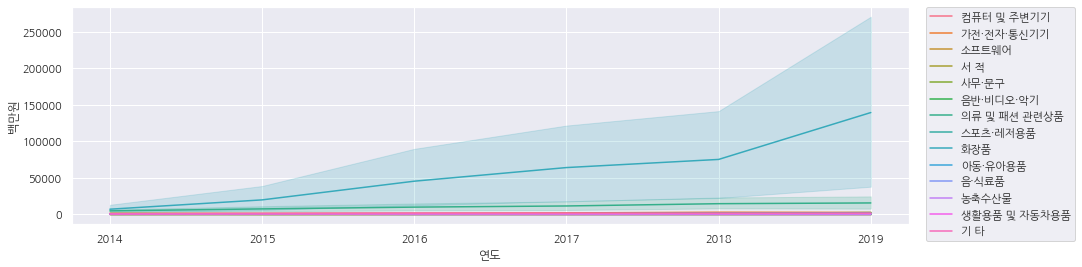

In [144]:
plt.figure(figsize=(15,4))

sns.lineplot(data= df_total, x='연도', y='백만원', hue='상품군별')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [ ]:
#해외직구액도 혼자서 분석 해보기 